<a href="https://colab.research.google.com/github/NishantRajora/Machine-Learning/blob/main/Lab2_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage

In [ ]:
# Now EDA on Wholesale customer data

df = pd.read_csv("Lab2_Wholesale customers data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


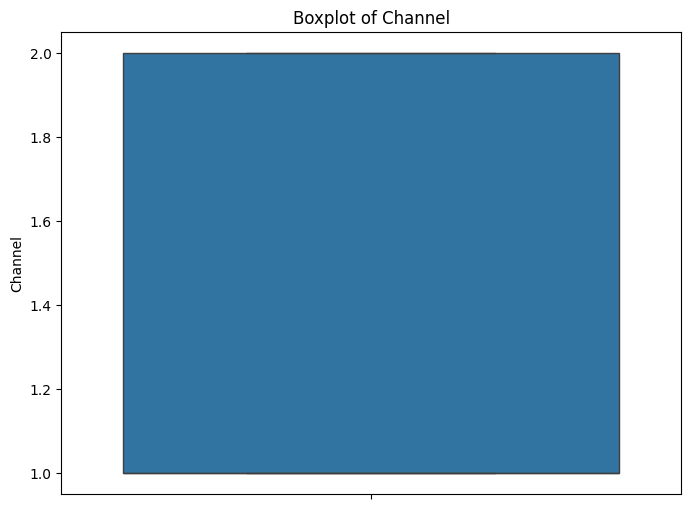

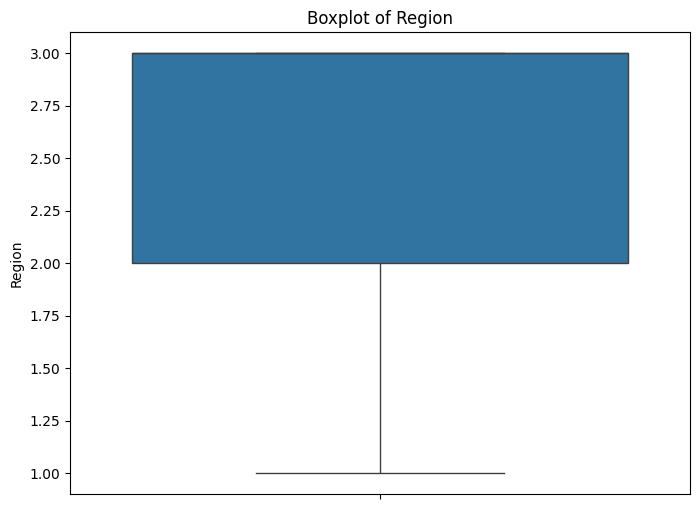

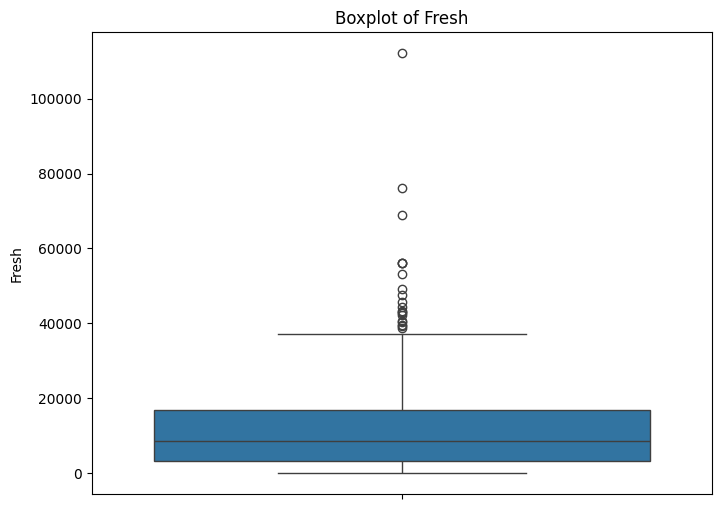

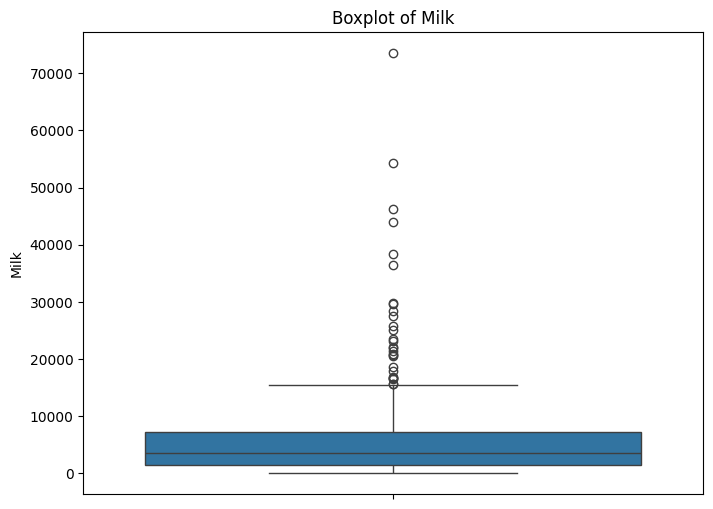

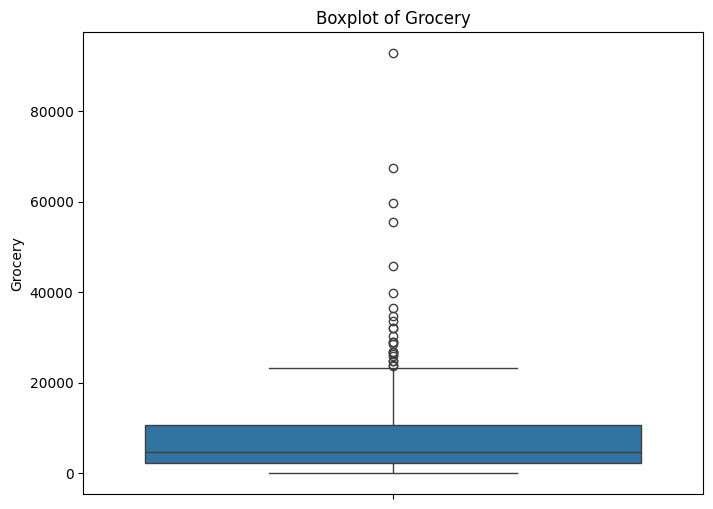

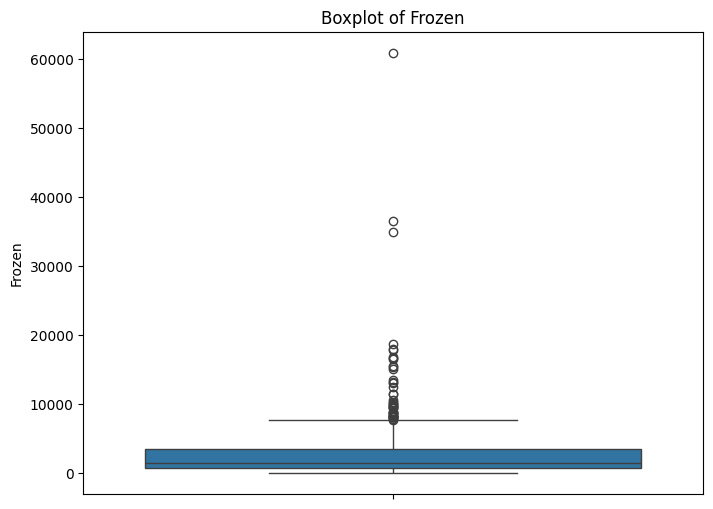

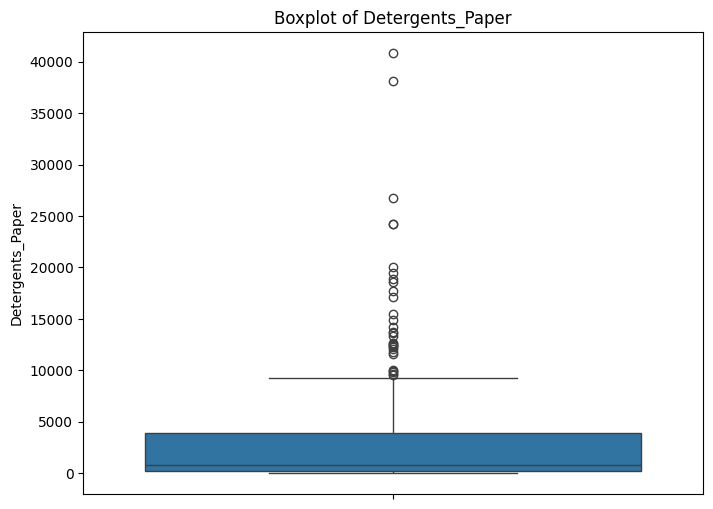

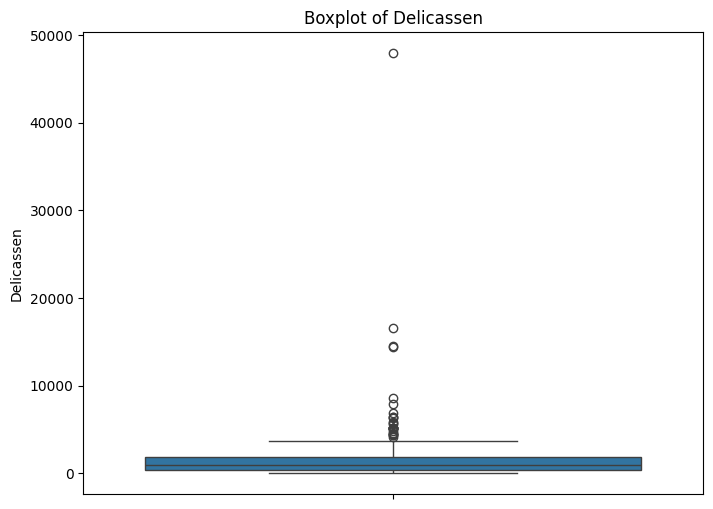

In [ ]:

# Boxplot for outliers
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.ylabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()


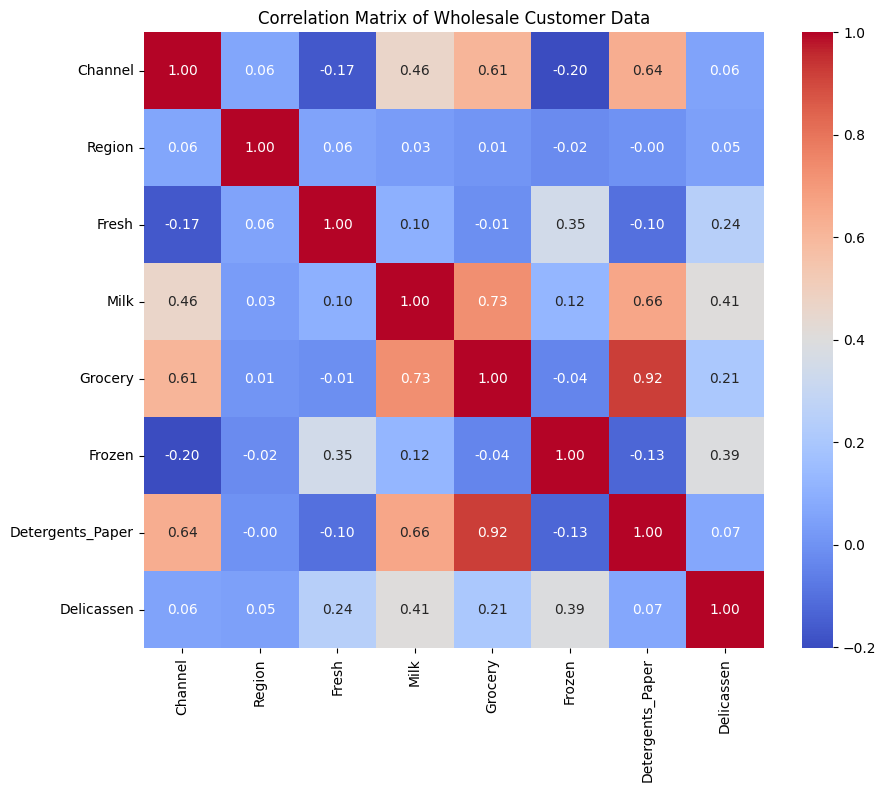

In [ ]:
#  Check Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wholesale Customer Data')
plt.show()

In [ ]:
# Standardise
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)

print("DataFrame after standardization (first 5 rows):")
print(df_scaled.head())

DataFrame after standardization (first 5 rows):
    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


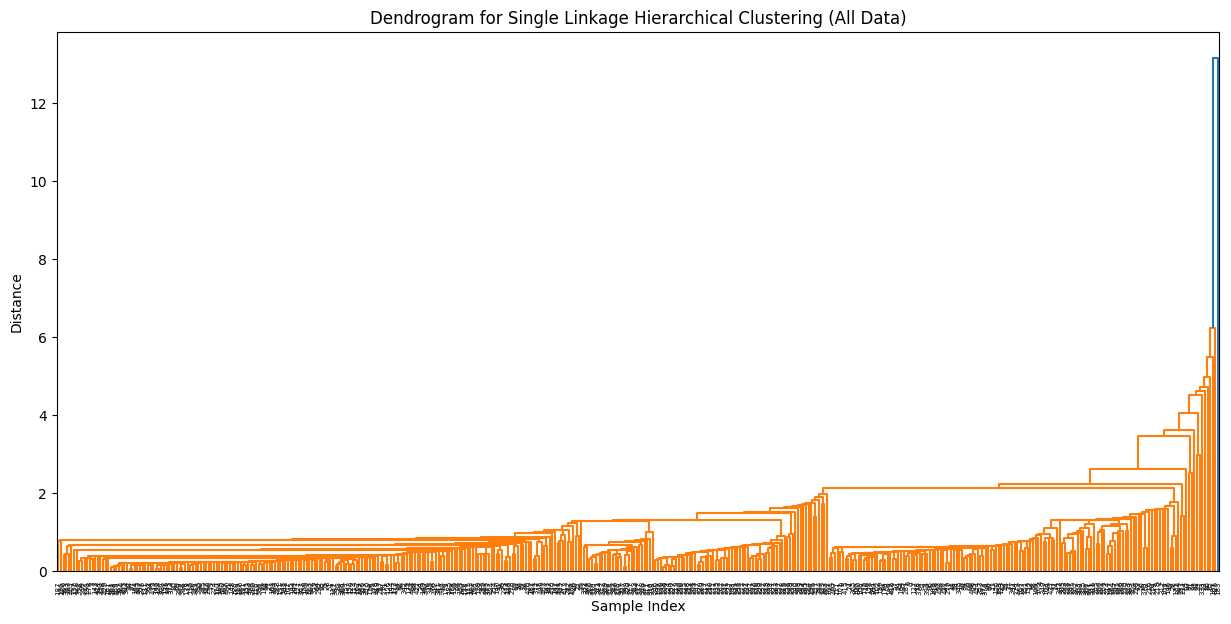

In [ ]:
plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    show_leaf_counts=True,
    distance_sort='descending'
)
plt.title('Dendrogram for Single Linkage Hierarchical Clustering (All Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Shape of the linkage matrix: (439, 4)


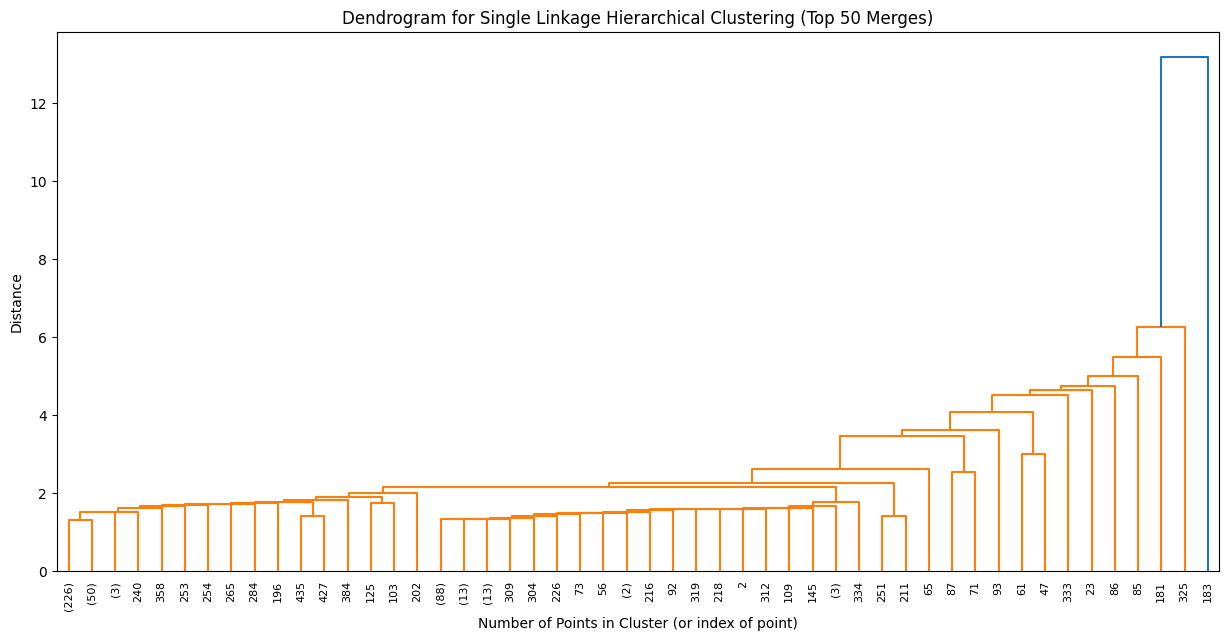

In [ ]:

linked = linkage(df_scaled, method='single')
print("Shape of the linkage matrix:", linked.shape)

plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',
    p=50,
    show_leaf_counts=True,
    distance_sort='descending'
)
plt.title('Dendrogram for Single Linkage Hierarchical Clustering (Top 50 Merges)')
plt.xlabel('Number of Points in Cluster (or index of point)')
plt.ylabel('Distance')
plt.show()